# Linear Autoencoder

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

In [2]:
# Iris 데이터셋 로드
data = load_iris()
X = data.data
y = data.target

# 데이터를 훈련 세트와 테스트 세트로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2024)

# 데이터 표준화
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# PyTorch 텐서로 변환
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [3]:
class LinearAutoencoder(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super(LinearAutoencoder, self).__init__()
        # 인코더
        self.encoder = nn.Linear(input_dim, hidden_dim)
        # 디코더
        self.decoder = nn.Linear(hidden_dim, input_dim)

    def forward(self, x):
        # 인코더 부분
        encoded = self.encoder(x)
        # 디코더 부분
        decoded = self.decoder(encoded)
        return decoded

In [4]:
# 입력 차원: Iris 데이터의 특성 수는 4, 숨김층(hidden layer) 차원은 2로 설정
input_dim = X_train.shape[1]
hidden_dim = 2
model = LinearAutoencoder(input_dim=input_dim, hidden_dim=hidden_dim)

# 손실 함수와 최적화 알고리즘 설정
criterion = nn.MSELoss()  # 재구성 손실을 최소화하기 위해 MSE 사용
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [5]:
# 학습을 위한 반복 설정
epochs = 100
for epoch in range(epochs):
    # 모델 예측
    outputs = model(X_train)
    loss = criterion(outputs, X_train)
    
    # 기울기 초기화
    optimizer.zero_grad()
    
    # 역전파 및 최적화
    loss.backward()
    optimizer.step()
    
    # 진행 상황 출력
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

Epoch [10/100], Loss: 1.2772
Epoch [20/100], Loss: 1.1400
Epoch [30/100], Loss: 1.0352
Epoch [40/100], Loss: 0.9497
Epoch [50/100], Loss: 0.8764
Epoch [60/100], Loss: 0.8112
Epoch [70/100], Loss: 0.7518
Epoch [80/100], Loss: 0.6969
Epoch [90/100], Loss: 0.6459
Epoch [100/100], Loss: 0.5986


In [6]:
# 테스트 세트에서 재구성된 결과 출력
with torch.no_grad():
    reconstructed = model(X_test)
    test_loss = criterion(reconstructed, X_test)
    print(f'Test Loss: {test_loss.item():.4f}')

Test Loss: 0.5598


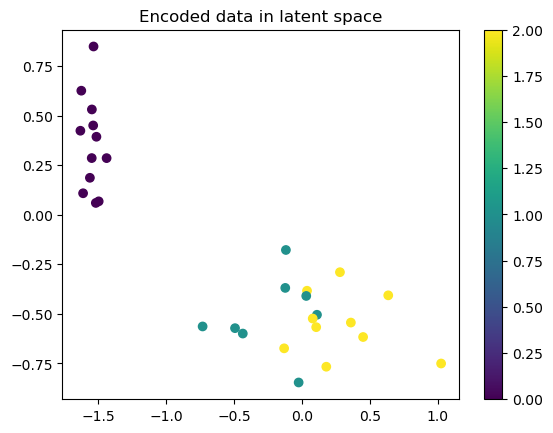

In [7]:
import matplotlib.pyplot as plt

# 잠재 공간에 인코딩된 데이터
with torch.no_grad():
    encoded_data = model.encoder(X_test).numpy()

# 2D 잠재 공간 시각화
plt.scatter(encoded_data[:, 0], encoded_data[:, 1], c=y_test, cmap='viridis')
plt.colorbar()
plt.title("Encoded data in latent space")
plt.show()

# Non-Linear Autoencoder

In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

In [9]:
# Iris 데이터셋 로드
data = load_iris()
X = data.data
y = data.target

# 데이터를 훈련 세트와 테스트 세트로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2024)

# 데이터 표준화
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# PyTorch 텐서로 변환
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [10]:
class NonLinearAutoencoder(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super(NonLinearAutoencoder, self).__init__()
        # 인코더
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU()  # 비선형 활성화 함수 사용
        )
        # 디코더
        self.decoder = nn.Sequential(
            nn.Linear(hidden_dim, input_dim),
            nn.ReLU()  # 비선형 활성화 함수 사용
        )

    def forward(self, x):
        # 인코더 부분
        encoded = self.encoder(x)
        # 디코더 부분
        decoded = self.decoder(encoded)
        return decoded

In [11]:
# 입력 차원: Iris 데이터의 특성 수는 4, 숨김층(hidden layer) 차원은 2로 설정
input_dim = X_train.shape[1]
hidden_dim = 2
model = NonLinearAutoencoder(input_dim=input_dim, hidden_dim=hidden_dim)

# 손실 함수와 최적화 알고리즘 설정
criterion = nn.MSELoss()  # 재구성 손실을 최소화하기 위해 MSE 사용
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [12]:
# 학습을 위한 반복 설정
epochs = 100
for epoch in range(epochs):
    # 모델 예측
    outputs = model(X_train)
    loss = criterion(outputs, X_train)
    
    # 기울기 초기화
    optimizer.zero_grad()
    
    # 역전파 및 최적화
    loss.backward()
    optimizer.step()
    
    # 진행 상황 출력
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

Epoch [10/100], Loss: 0.9814
Epoch [20/100], Loss: 0.9503
Epoch [30/100], Loss: 0.9379
Epoch [40/100], Loss: 0.9235
Epoch [50/100], Loss: 0.9121
Epoch [60/100], Loss: 0.9034
Epoch [70/100], Loss: 0.8968
Epoch [80/100], Loss: 0.8409
Epoch [90/100], Loss: 0.8275
Epoch [100/100], Loss: 0.8121


In [13]:
# 테스트 세트에서 재구성된 결과 출력
with torch.no_grad():
    reconstructed = model(X_test)
    test_loss = criterion(reconstructed, X_test)
    print(f'Test Loss: {test_loss.item():.4f}')

Test Loss: 0.8863


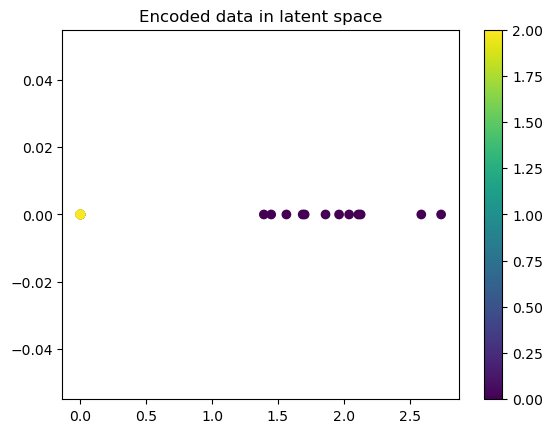

In [14]:
import matplotlib.pyplot as plt

# 잠재 공간에 인코딩된 데이터
with torch.no_grad():
    encoded_data = model.encoder(X_test).numpy()

# 2D 잠재 공간 시각화
plt.scatter(encoded_data[:, 0], encoded_data[:, 1], c=y_test, cmap='viridis')
plt.colorbar()
plt.title("Encoded data in latent space")
plt.show()

# ConvLSTM

In [16]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

In [25]:
class ConvLSTMCell(nn.Module):
    def __init__(self, input_dim, hidden_dim, kernel_size, bias=True):
        super(ConvLSTMCell, self).__init__()

        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.kernel_size = kernel_size

        # 커널 크기별로 패딩을 설정합니다.
        self.padding = (kernel_size[0] // 2, kernel_size[1] // 2)
        self.bias = bias

        # Convolution 연산을 수행합니다.
        self.conv = nn.Conv2d(in_channels=self.input_dim + self.hidden_dim,
                              out_channels=4 * self.hidden_dim,
                              kernel_size=self.kernel_size,
                              padding=self.padding,
                              bias=self.bias)

    def forward(self, input_tensor, cur_state):
        h_cur, c_cur = cur_state
        
        # 입력과 현재 은닉 상태를 결합 (채널 방향으로)
        # 이때, input_tensor는 (batch_size, channels, height, width) 형식을 가져야 함
        combined = torch.cat([input_tensor, h_cur], dim=1)
        combined_conv = self.conv(combined)

        # 각 게이트 분리
        cc_i, cc_f, cc_o, cc_g = torch.split(combined_conv, self.hidden_dim, dim=1)

        # 게이트 계산
        i = torch.sigmoid(cc_i)
        f = torch.sigmoid(cc_f)
        o = torch.sigmoid(cc_o)
        g = torch.tanh(cc_g)

        c_next = f * c_cur + i * g
        h_next = o * torch.tanh(c_next)

        return h_next, c_next

    def init_hidden(self, batch_size, image_size):
        height, width = image_size
        return (torch.zeros(batch_size, self.hidden_dim, height, width, device=self.conv.weight.device),
                torch.zeros(batch_size, self.hidden_dim, height, width, device=self.conv.weight.device))


In [29]:
class ConvLSTM(nn.Module):
    def __init__(self, input_dim, hidden_dim, kernel_size, num_layers, batch_first=False, bias=True):
        super(ConvLSTM, self).__init__()

        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.kernel_size = kernel_size
        self.num_layers = num_layers
        self.batch_first = batch_first
        self.bias = bias

        self.cell_list = nn.ModuleList()

        # 첫 번째 레이어의 입력 채널 수는 input_dim, 이후 레이어의 입력 채널 수는 hidden_dim
        self.cell_list.append(ConvLSTMCell(input_dim=self.input_dim, 
                                           hidden_dim=self.hidden_dim, 
                                           kernel_size=self.kernel_size, 
                                           bias=self.bias))

        for i in range(1, self.num_layers):
            self.cell_list.append(ConvLSTMCell(input_dim=self.hidden_dim, 
                                               hidden_dim=self.hidden_dim, 
                                               kernel_size=self.kernel_size, 
                                               bias=self.bias))

    def forward(self, input_tensor, hidden_state=None):
        # input_tensor는 (batch_size, time_steps, channels, height, width) 형식
        if self.batch_first:
            # batch_size, time_steps, channels, height, width 순서일 경우 time_steps 축을 교환
            input_tensor = input_tensor.permute(1, 0, 2, 3, 4)

        batch_size, time_steps, _, height, width = input_tensor.size()

        # 초기 hidden_state 설정
        if hidden_state is None:
            hidden_state = self._init_hidden(batch_size, (height, width))

        layer_output_list = []
        last_state_list = []

        cur_layer_input = input_tensor

        for layer_idx in range(self.num_layers):

            h, c = hidden_state[layer_idx]
            output_inner = []

            for t in range(time_steps):
                # 각 시간 단계에서 (batch_size, channels, height, width)로 전달
                h, c = self.cell_list[layer_idx](input_tensor=cur_layer_input[t], cur_state=[h, c])
                output_inner.append(h)

            layer_output = torch.stack(output_inner, dim=0)
            cur_layer_input = layer_output

            layer_output_list.append(layer_output)
            last_state_list.append([h, c])

        # batch_first가 True일 경우 다시 배치 차원을 앞으로 변경
        if self.batch_first:
            layer_output_list = [layer_output.permute(1, 0, 2, 3, 4) for layer_output in layer_output_list]

        return layer_output_list, last_state_list

    def _init_hidden(self, batch_size, image_size):
        init_states = []
        for i in range(self.num_layers):
            init_states.append(self.cell_list[i].init_hidden(batch_size, image_size))
        return init_states


In [30]:
# 가상 데이터 생성 (배치 크기 2, 시간 단계 5, 채널 1, 높이 64, 너비 64)
batch_size = 2
time_steps = 5
channels = 1
height = 64
width = 64

# 무작위 데이터
input_data = torch.randn(batch_size, time_steps, channels, height, width)


In [31]:
# 모델 초기화 (입력 차원 1, 은닉 차원 16, 커널 크기 3, 레이어 수 2)
model = ConvLSTM(input_dim=1, hidden_dim=16, kernel_size=(3, 3), num_layers=2, batch_first=True)

# 입력 데이터에 대해 forward 패스 실행
output, state = model(input_data)

# 출력 확인
print(f"Output shape: {output[-1].shape}")  # 마지막 레이어 출력


RuntimeError: Sizes of tensors must match except in dimension 1. Expected size 2 but got size 5 for tensor number 1 in the list.

In [33]:
class ConvLSTMCell(nn.Module):
    def forward(self, input_tensor, cur_state):
        h_cur, c_cur = cur_state
        
        print(f"Input Tensor shape: {input_tensor.shape}")  # 입력 텐서의 크기 확인
        print(f"Hidden State shape: {h_cur.shape}")  # 은닉 상태의 크기 확인
        
        # 입력과 현재 은닉 상태를 결합
        combined = torch.cat([input_tensor, h_cur], dim=1)  # 채널 방향으로 결합
        combined_conv = self.conv(combined)
        
        # 각 게이트 분리
        cc_i, cc_f, cc_o, cc_g = torch.split(combined_conv, self.hidden_dim, dim=1)

        i = torch.sigmoid(cc_i)
        f = torch.sigmoid(cc_f)
        o = torch.sigmoid(cc_o)
        g = torch.tanh(cc_g)

        c_next = f * c_cur + i * g
        h_next = o * torch.tanh(c_next)

        return h_next, c_next


# 잡음 제거 오토인코더

In [38]:
pip install torchvision

   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   - -------------------------------------- 0.0/1.3 MB 653.6 kB/s eta 0:00:02
   ---------- ----------------------------- 0.3/1.3 MB 3.4 MB/s eta 0:00:01
   ----------------------- ---------------- 0.8/1.3 MB 5.4 MB/s eta 0:00:01
   ----------------------------------- ---- 1.2/1.3 MB 6.1 MB/s eta 0:00:01
   ---------------------------------------- 1.3/1.3 MB 6.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [39]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt


In [40]:
def add_noise(inputs, noise_factor=0.3):
    noisy = inputs + noise_factor * torch.randn_like(inputs)
    noisy = torch.clip(noisy, 0., 1.)
    return noisy


In [41]:
class DenoisingAutoencoder(nn.Module):
    def __init__(self):
        super(DenoisingAutoencoder, self).__init__()
        
        # 인코더: 입력을 압축
        self.encoder = nn.Sequential(
            nn.Linear(28*28, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU()
        )
        
        # 디코더: 압축된 정보를 다시 복원
        self.decoder = nn.Sequential(
            nn.Linear(32, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 28*28),
            nn.Sigmoid()
        )

    def forward(self, x):
        # 인코더와 디코더를 거쳐 입력을 복원
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded


In [42]:
from torchvision import datasets, transforms

# 데이터 전처리 (MNIST 데이터셋을 사용)
transform = transforms.Compose([transforms.ToTensor()])

train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)


Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1006)>



100%|███████████████████████████████████████████████████████████████████| 9912422/9912422 [00:05<00:00, 1925548.04it/s]


Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1006)>



100%|████████████████████████████████████████████████████████████████████████| 28881/28881 [00:00<00:00, 165596.32it/s]


Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1006)>



100%|███████████████████████████████████████████████████████████████████| 1648877/1648877 [00:01<00:00, 1238422.54it/s]


Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1006)>



100%|█████████████████████████████████████████████████████████████████████████| 4542/4542 [00:00<00:00, 2280408.04it/s]

Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw



In [43]:
# 모델 초기화
model = DenoisingAutoencoder()
criterion = nn.MSELoss()  # 손실 함수: MSE
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 학습 반복
num_epochs = 10
for epoch in range(num_epochs):
    for data in train_loader:
        imgs, _ = data  # 이미지 데이터만 사용
        imgs = imgs.view(imgs.size(0), -1)  # 28x28 이미지를 784차원으로 평탄화

        # 노이즈 추가
        noisy_imgs = add_noise(imgs)

        # 순전파
        outputs = model(noisy_imgs)
        loss = criterion(outputs, imgs)

        # 역전파 및 최적화
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


Epoch [1/10], Loss: 0.0361
Epoch [2/10], Loss: 0.0329
Epoch [3/10], Loss: 0.0252
Epoch [4/10], Loss: 0.0237
Epoch [5/10], Loss: 0.0233
Epoch [6/10], Loss: 0.0237
Epoch [7/10], Loss: 0.0197
Epoch [8/10], Loss: 0.0197
Epoch [9/10], Loss: 0.0167
Epoch [10/10], Loss: 0.0161


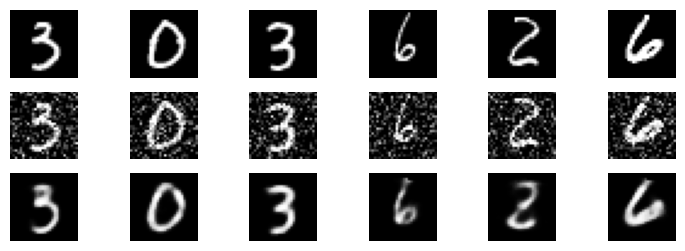

In [44]:
# 일부 이미지의 노이즈 제거 결과 확인
with torch.no_grad():
    for data in train_loader:
        imgs, _ = data
        imgs = imgs.view(imgs.size(0), -1)
        noisy_imgs = add_noise(imgs)
        outputs = model(noisy_imgs)
        
        # 원본, 노이즈가 추가된 입력, 복원된 출력 시각화
        imgs = imgs.view(-1, 28, 28)
        noisy_imgs = noisy_imgs.view(-1, 28, 28)
        outputs = outputs.view(-1, 28, 28)
        
        plt.figure(figsize=(9, 3))
        for i in range(6):
            # 원본 이미지
            plt.subplot(3, 6, i + 1)
            plt.imshow(imgs[i].cpu().numpy(), cmap='gray')
            plt.axis('off')
            
            # 노이즈가 추가된 이미지
            plt.subplot(3, 6, i + 7)
            plt.imshow(noisy_imgs[i].cpu().numpy(), cmap='gray')
            plt.axis('off')
            
            # 복원된 이미지
            plt.subplot(3, 6, i + 13)
            plt.imshow(outputs[i].cpu().numpy(), cmap='gray')
            plt.axis('off')
        plt.show()
        break
